# new_ltpp - Getting Started Guide

This notebook presents the main features of the **new_ltpp** (Easy Temporal Point Processes) library with practical examples.

## 🎯 Notebook Objectives

- Understand the basic concepts of temporal point processes
- Learn to configure and train models
- Explore the different types of data and available models
- Visualize and analyze results

## 📚 Table of Contents

1. [Environment Setup](#1-configuration)
2. [Basic Concepts](#2-concepts)
3. [Data Loading and Preparation](#3-data-loading-and-preparation)
4. [Model Configuration and Training](#4-model-configuration-and-training)
5. [Evaluation and Metrics](#5-evaluation-and-metrics)
6. [Advanced Examples](#6-advanced-examples)
7. [Prediction Phase and Distribution Analysis](#7-prediction)

## 1. Environment Setup {#1-configuration}

Let's start by importing the necessary modules and setting up the environment.

In [ ]:
from pathlib import Path
from new_ltpp.configs.config_builders import RunnerConfigBuilder, DataConfigBuilder
from new_ltpp.runners import RunnerManager

# Add the project root directory to PYTHONPATH
ROOT = Path().absolute().parent

CONFIGS = ROOT / "yaml_configs" / "configs.yaml"

print("✅ new_ltpp imported successfully!")
print(f"📁 Project directory: {ROOT}")

✅ new_ltpp imported successfully!
📁 Project directory: c:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP


## 2. Basic Concepts {#2-concepts}

### What is a Temporal Point Process?

A **Temporal Point Process** (TPP) is a sequence of events that occur over time. Each event is characterized by:

- **Occurrence time**: When the event happens
- **Event type**: What category of event (optional)

### Application examples:

- 🏥 **Medical**: Patient arrivals at a hospital
- 💰 **Finance**: Stock market transactions
- 🌍 **Geophysics**: Earthquakes
- 📱 **Social Networks**: User posts

### Models available in new_ltpp:

- **NHP** (Neural Hawkes Process): Hawkes processes with neural networks
- **THP** (Transformer Hawkes Process): Based on Transformer architecture
- **RMTPP** (Recurrent Marked Temporal Point Process): Based on RNNs
- **ANHP** (Attentive Neural Hawkes Process): With attention mechanism

## 3. Data Loading and Preparation {#3-donnees}

new_ltpp supports multiple data formats. Let's see how to load and prepare data.

In [17]:
from new_ltpp.data.preprocess import TPPDataModule

In [ ]:

builder = DataConfigBuilder()
(builder
    .set_dataset_id("test")
    .set_src_dir("NzoCs/test_dataset")
    .set_num_event_types(2)
)
data_config = builder.build()

print("📦 Generated data configuration:")
print(data_config)

2025-11-09 21:31:49,206 - config_factory.py[pid:19864;line:95:create_config] - INFO: Creating configuration: DataConfig
📦 Generated data configuration:
DataConfig({'train_dir': 'NzoCs/test_dataset', 'valid_dir': 'NzoCs/test_dataset', 'test_dir': 'NzoCs/test_dataset', 'data_format': 'NzoCs/test_dataset', 'dataset_id': 'test', 'data_loading_specs': {'batch_size': 32, 'tensor_type': 'pt', 'num_workers': 2, 'shuffle': True, 'padding': None, 'truncation': None, 'max_len': None}, 'tokenizer_specs': {'num_event_types': 2, 'pad_token_id': 2, 'padding_side': 'left', 'truncation_side': 'left', 'padding_strategy': 'longest', 'truncation_strategy': None, 'max_len': 128}})
📦 Generated data configuration:
DataConfig({'train_dir': 'NzoCs/test_dataset', 'valid_dir': 'NzoCs/test_dataset', 'test_dir': 'NzoCs/test_dataset', 'data_format': 'NzoCs/test_dataset', 'dataset_id': 'test', 'data_loading_specs': {'batch_size': 32, 'tensor_type': 'pt', 'num_workers': 2, 'shuffle': True, 'padding': None, 'truncatio

In [19]:
# Create data module
datamodule = TPPDataModule(data_config)
datamodule.setup(stage='fit')  # Setup for training and validation

# Get data loaders
train_loader = datamodule.train_dataloader()
val_loader = datamodule.val_dataloader()

print("✅ Data loaders created successfully!")
print(f"   📈 Train loader: {len(train_loader)} batches")
print(f"   📊 Validation loader: {len(val_loader)} batches")

2025-11-09 21:31:49,215 - data_loader.py[pid:19864;line:189:setup] - INFO: Setting up data for stage: fit
2025-11-09 21:31:52,960 - data_loader.py[pid:19864;line:198:setup] - INFO: Train dataset created with 6 sequences
2025-11-09 21:31:56,328 - data_loader.py[pid:19864;line:207:setup] - INFO: Validation dataset created with 2 sequences
✅ Data loaders created successfully!
   📈 Train loader: 1 batches
   📊 Validation loader: 1 batches


### Data Inspection

Let's use the Visualizer to analyze the data distribution.

Generating visualization plots...
Metadata saved to ./analysis_plots\inter_event_time_dist.json
Inter-event time distribution plot saved to ./analysis_plots\inter_event_time_dist.png


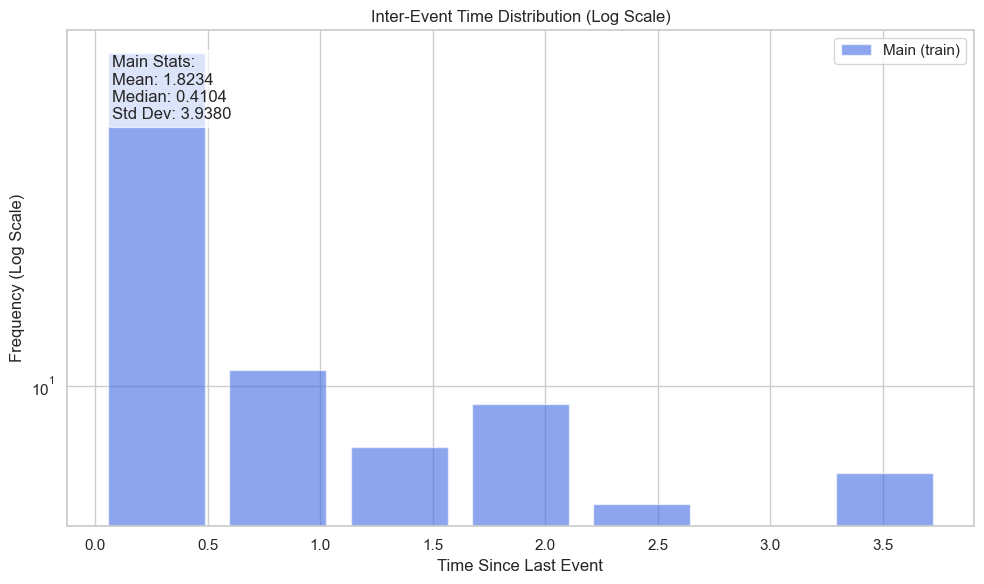

Metadata saved to ./analysis_plots\event_type_dist.json
Event type distribution plot saved to ./analysis_plots\event_type_dist.png


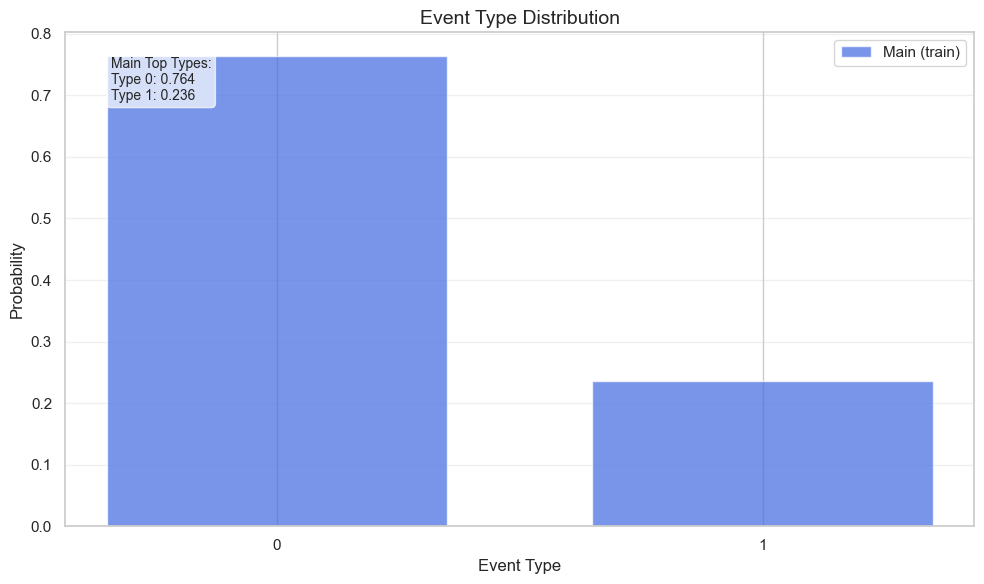

Metadata saved to ./analysis_plots\sequence_length_dist.json
Sequence length distribution plot saved to ./analysis_plots\sequence_length_dist.png


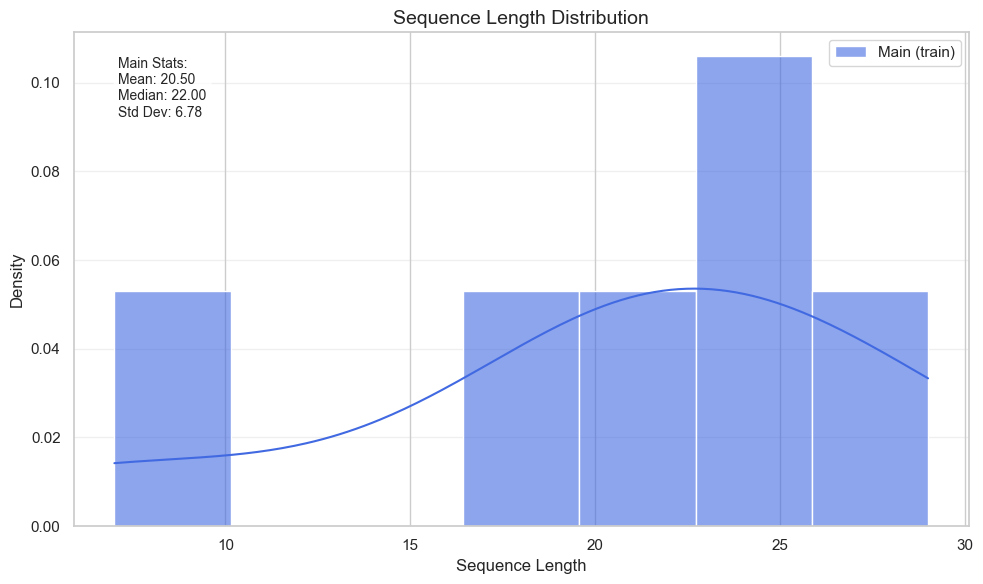

All plots generated successfully!
Metadata saved to ./analysis_plots\inter_event_time_dist.json
Inter-event time distribution plot saved to ./analysis_plots\inter_event_time_dist.png


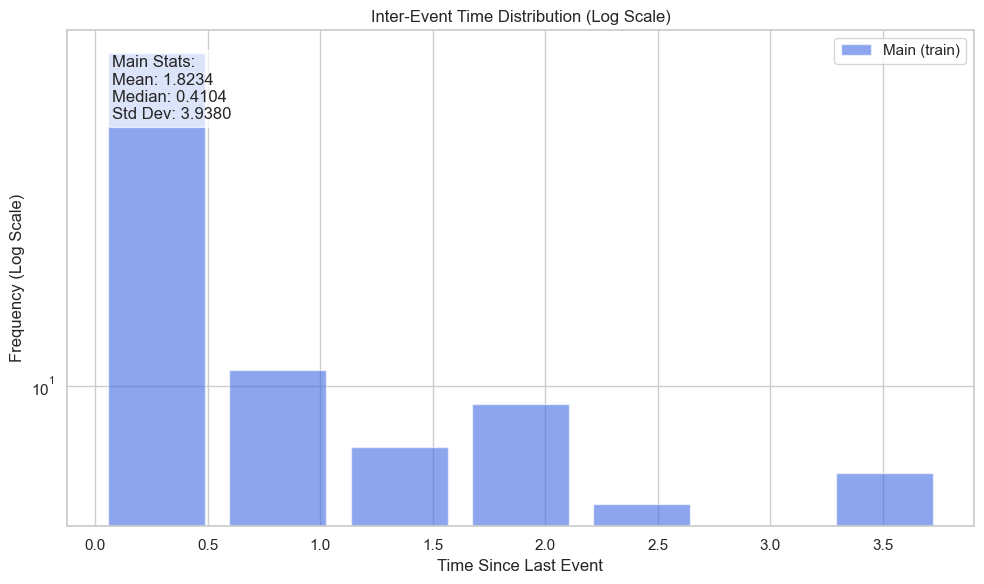

Metadata saved to ./analysis_plots\event_type_dist.json
Event type distribution plot saved to ./analysis_plots\event_type_dist.png


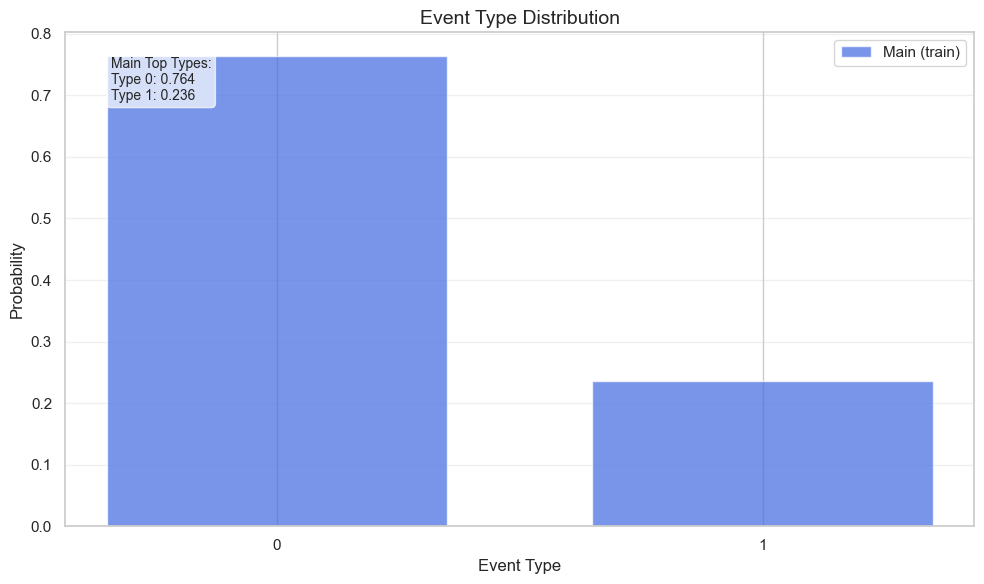

📈 Analysis plots generated!
   Check the './analysis_plots' folder for saved graphs


In [ ]:
from new_ltpp.data.preprocess.visualizer import Visualizer

# Create the visualizer
visualizer = Visualizer(
    data_module=datamodule,
    split="train",
    save_dir="./analysis_plots"
)

# Generate visualizations
visualizer.plot_inter_event_times(show=True, save=True)
visualizer.plot_event_types(show=True, save=True)
visualizer.plot_sequence_lengths(show=True, save=True)

print("📈 Analysis plots generated!")
print("   Check the './analysis_plots' folder for saved graphs")

## 4. Model Configuration and Training {#4-entrainement}

Now, let's configure and train a Neural Hawkes Process (NHP) model.

In [ ]:
# Build runner configuration from YAML using RunnerConfigYamlLoader
from new_ltpp.configs.config_loaders import RunnerConfigYamlLoader

runner_builder = RunnerConfigBuilder()
loader = RunnerConfigYamlLoader()
runner_cfg = loader.load(
    yaml_path=str(CONFIGS),
    training_config_path="training_configs.quick_test",
    model_config_path="model_configs.neural_small",
    data_loading_config_path="data_loading_configs.quick_test",
    data_config_path="data_configs.test",
    thinning_config_path="thinning_configs.thinning_fast",
    logger_config_path="logger_configs.csv",
    simulation_config_path="simulation_configs.simulation_fast",
)

runner_builder.from_dict(runner_cfg)
runner_config = runner_builder.build(model_id="NHP")

print("⚙️ Runner configuration built via factory + builder")
print("   🧠 Model: NHP")
print("   📊 Dataset: test")

2025-11-09 21:32:02,827 - config_factory.py[pid:19864;line:95:create_config] - INFO: Creating configuration: RunnerConfig
⚙️ Runner configuration built via factory + builder
   🧠 Model: NHP
   📊 Dataset: test
⚙️ Runner configuration built via factory + builder
   🧠 Model: NHP
   📊 Dataset: test


In [ ]:
# Alternative: Build runner config programmatically using set_* methods (no YAML loading)
print("⚙️ Building runner config programmatically without YAML...")
runner_config_builder = RunnerConfigBuilder()

runner_config_builder.set_save_dir("./custom_output")

# Set training config
training_builder = runner_config_builder.training_builder
(training_builder
    .set_max_epochs(50)
    .set_lr(1e-3)
    .set_lr_scheduler(True)
    .set_val_freq(1)
    .set_patience(3)
    .set_accumulate_grad_batches(1)
    .set_devices(1)
)

# Build data config
data_builder = runner_config_builder.data_builder
(data_builder
    .set_num_event_types(2)
    .set_dataset_id("test")
    .set_src_dir("NzoCs/test_dataset")
    .set_data_format("hf")
    .set_data_loading_specs(
        batch_size=64,
        num_workers=2,
        shuffle=True,
        max_len=128
    )
)

# Build model config
model_builder = runner_config_builder.model_builder
(model_builder
    .set_general_specs({"hidden_size": 32})
    .set_model_specs({})
    .set_num_mc_samples(1)
    .set_scheduler_config(lr_scheduler=True, lr=1e-3, max_epochs=50)
    .set_simulation_config(time_window=30, batch_size=16, max_sim_events=5000, seed=42)
    .set_thinning_config(num_sample=15, num_exp=50, over_sample_rate=1.2)
)

# Build the config
custom_runner_config = runner_config_builder.build(model_id="NHP")

print("✅ Programmatic runner config built successfully!")
print("   🧠 Model: NHP")
print("   📊 Dataset: test")
print(f"   🔢 Max Epochs: {custom_runner_config.training_config.max_epochs}")
print(f"   📦 Batch Size: {custom_runner_config.data_config.data_loading_specs.batch_size}")
print(f"   💾 Save Dir: {custom_runner_config.save_dir}")

⚙️ Building runner config programmatically without YAML...
2025-11-09 21:32:02,855 - config_factory.py[pid:19864;line:95:create_config] - INFO: Creating configuration: RunnerConfig
✅ Programmatic runner config built successfully!
   🧠 Model: NHP
   📊 Dataset: test
   🔢 Max Epochs: 50
   📦 Batch Size: 64
   💾 Save Dir: C:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP\artifacts\NHP\test\logs
✅ Programmatic runner config built successfully!
   🧠 Model: NHP
   📊 Dataset: test
   🔢 Max Epochs: 50
   📦 Batch Size: 64
   💾 Save Dir: C:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP\artifacts\NHP\test\logs


In [23]:
# Create runner manager and start training
runner = RunnerManager(config=custom_runner_config, output_dir="./training_results")

print("🚀 Starting training...")
print("   This may take a few minutes depending on your configuration.")

# Train the model
runner.run(phase="train")

print("✅ Training completed!")

2025-11-09 21:32:02,871 - runner.py[pid:19864;line:31:__init__] - CRITICAL: Runner initialized for model: NHP on dataset: test
🚀 Starting training...
   This may take a few minutes depending on your configuration.
2025-11-09 21:32:02,873 - runner.py[pid:19864;line:96:run] - INFO: Runner executing phases: ['train']
2025-11-09 21:32:02,874 - runner.py[pid:19864;line:54:train] - INFO: === TRAINING PHASE ===
2025-11-09 21:32:07,583 - data_loader.py[pid:19864;line:80:estimate_dtime_max] - INFO: Estimated dtime_max from train data: 24.5544 (quantile=0.995)
2025-11-09 21:32:07,585 - model_factory.py[pid:19864;line:43:create_model_by_name] - INFO: Création du modèle: NHP
2025-11-09 21:32:07,590 - model_runner.py[pid:19864;line:56:latest_best] - INFO: No 'best' checkpoints found in C:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP\artifacts\NHP\test\saved_model
2025-11-09 21:32:07,592 - model_runner.py[pid:19864;line:277:train] - INFO: --- Starting Training for Model : NHP on datas

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-11-09 21:32:07,634 - data_loader.py[pid:19864;line:189:setup] - INFO: Setting up data for stage: fit
2025-11-09 21:32:11,908 - data_loader.py[pid:19864;line:198:setup] - INFO: Train dataset created with 6 sequences
2025-11-09 21:32:16,321 - data_loader.py[pid:19864;line:207:setup] - INFO: Validation dataset created with 2 sequences



  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | layer_type_emb  | Embedding        | 384    | train
1 | rnn_cell        | ContTimeLSTMCell | 230 K  | train
2 | layer_intensity | Sequential       | 260    | train
-------------------------------------------------------------
230 K     Trainable params
0         Non-trainable params
230 K     Total params
0.924     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


c:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP\.venv\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:310: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=5). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0: 100%|██████████| 1/1 [00:15<00:00,  0.07it/s, v_num=0, val_loss=3.010, train_loss=2.990]

Metric val_loss improved. New best score: 3.008


Epoch 1: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s, v_num=0, val_loss=2.810, train_loss=2.680]

Metric val_loss improved by 0.198 >= min_delta = 0.0. New best score: 2.810


Epoch 2: 100%|██████████| 1/1 [00:00<00:00,  1.58it/s, v_num=0, val_loss=2.640, train_loss=2.430]

Metric val_loss improved by 0.165 >= min_delta = 0.0. New best score: 2.645


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s, v_num=0, val_loss=2.510, train_loss=2.240]

Metric val_loss improved by 0.133 >= min_delta = 0.0. New best score: 2.511


Epoch 4: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s, v_num=0, val_loss=2.410, train_loss=2.090]

Metric val_loss improved by 0.103 >= min_delta = 0.0. New best score: 2.408


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s, v_num=0, val_loss=2.330, train_loss=1.990]

Metric val_loss improved by 0.076 >= min_delta = 0.0. New best score: 2.332


Epoch 6: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s, v_num=0, val_loss=2.280, train_loss=1.920]

Metric val_loss improved by 0.053 >= min_delta = 0.0. New best score: 2.279


Epoch 7: 100%|██████████| 1/1 [00:01<00:00,  0.95it/s, v_num=0, val_loss=2.240, train_loss=1.860]

Metric val_loss improved by 0.036 >= min_delta = 0.0. New best score: 2.243


Epoch 8: 100%|██████████| 1/1 [00:00<00:00,  1.71it/s, v_num=0, val_loss=2.220, train_loss=1.820]

Metric val_loss improved by 0.024 >= min_delta = 0.0. New best score: 2.220


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s, v_num=0, val_loss=2.200, train_loss=1.780]

Metric val_loss improved by 0.017 >= min_delta = 0.0. New best score: 2.203


Epoch 10: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s, v_num=0, val_loss=2.190, train_loss=1.740]

Metric val_loss improved by 0.014 >= min_delta = 0.0. New best score: 2.189


Epoch 11: 100%|██████████| 1/1 [00:00<00:00,  1.55it/s, v_num=0, val_loss=2.180, train_loss=1.710]

Metric val_loss improved by 0.014 >= min_delta = 0.0. New best score: 2.176


Epoch 12: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s, v_num=0, val_loss=2.160, train_loss=1.680]

Metric val_loss improved by 0.015 >= min_delta = 0.0. New best score: 2.161


Epoch 13: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s, v_num=0, val_loss=2.140, train_loss=1.650]

Metric val_loss improved by 0.017 >= min_delta = 0.0. New best score: 2.144


Epoch 14: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s, v_num=0, val_loss=2.130, train_loss=1.630]

Metric val_loss improved by 0.018 >= min_delta = 0.0. New best score: 2.125


Epoch 15: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s, v_num=0, val_loss=2.110, train_loss=1.610]

Metric val_loss improved by 0.020 >= min_delta = 0.0. New best score: 2.106


Epoch 16: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s, v_num=0, val_loss=2.080, train_loss=1.590]

Metric val_loss improved by 0.021 >= min_delta = 0.0. New best score: 2.085


Epoch 17: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s, v_num=0, val_loss=2.060, train_loss=1.570]

Metric val_loss improved by 0.021 >= min_delta = 0.0. New best score: 2.064


Epoch 18: 100%|██████████| 1/1 [00:00<00:00,  1.56it/s, v_num=0, val_loss=2.040, train_loss=1.560]

Metric val_loss improved by 0.020 >= min_delta = 0.0. New best score: 2.044


Epoch 19: 100%|██████████| 1/1 [00:00<00:00,  1.57it/s, v_num=0, val_loss=2.030, train_loss=1.540]

Metric val_loss improved by 0.019 >= min_delta = 0.0. New best score: 2.026


Epoch 20: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s, v_num=0, val_loss=2.010, train_loss=1.530]

Metric val_loss improved by 0.017 >= min_delta = 0.0. New best score: 2.009


Epoch 21: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s, v_num=0, val_loss=1.990, train_loss=1.520]

Metric val_loss improved by 0.015 >= min_delta = 0.0. New best score: 1.994


Epoch 22: 100%|██████████| 1/1 [00:00<00:00,  1.52it/s, v_num=0, val_loss=1.980, train_loss=1.510]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 1.980


Epoch 23: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s, v_num=0, val_loss=1.970, train_loss=1.500]

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 1.968


Epoch 24: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s, v_num=0, val_loss=1.960, train_loss=1.500]

Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 1.957


Epoch 25: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s, v_num=0, val_loss=1.950, train_loss=1.490]

Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 1.946


Epoch 26: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s, v_num=0, val_loss=1.930, train_loss=1.480]

Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 1.935


Epoch 27: 100%|██████████| 1/1 [00:00<00:00,  1.53it/s, v_num=0, val_loss=1.920, train_loss=1.470]

Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 1.924


Epoch 28: 100%|██████████| 1/1 [00:00<00:00,  1.62it/s, v_num=0, val_loss=1.910, train_loss=1.470]

Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 1.914


Epoch 29: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s, v_num=0, val_loss=1.900, train_loss=1.460]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 1.905


Epoch 30: 100%|██████████| 1/1 [00:00<00:00,  1.67it/s, v_num=0, val_loss=1.900, train_loss=1.460]

Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 1.897


Epoch 31: 100%|██████████| 1/1 [00:00<00:00,  1.48it/s, v_num=0, val_loss=1.890, train_loss=1.450]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 1.890


Epoch 32: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s, v_num=0, val_loss=1.890, train_loss=1.450]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 1.886


Epoch 33: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s, v_num=0, val_loss=1.880, train_loss=1.440]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 1.882


Epoch 34: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s, v_num=0, val_loss=1.880, train_loss=1.440]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 1.880


Epoch 35: 100%|██████████| 1/1 [00:01<00:00,  0.97it/s, v_num=0, val_loss=1.880, train_loss=1.430]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 1.877


Epoch 36: 100%|██████████| 1/1 [00:00<00:00,  1.89it/s, v_num=0, val_loss=1.870, train_loss=1.430]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 1.874


Epoch 37: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s, v_num=0, val_loss=1.870, train_loss=1.420]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 1.871


Epoch 38: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s, v_num=0, val_loss=1.870, train_loss=1.420]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 1.867


Epoch 39: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s, v_num=0, val_loss=1.860, train_loss=1.420]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 1.863


Epoch 40: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s, v_num=0, val_loss=1.860, train_loss=1.410]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 1.861


Epoch 41: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s, v_num=0, val_loss=1.860, train_loss=1.410]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 1.858


Epoch 42: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s, v_num=0, val_loss=1.860, train_loss=1.400]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 1.857


Epoch 43: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s, v_num=0, val_loss=1.860, train_loss=1.400]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 1.856


Epoch 44: 100%|██████████| 1/1 [00:01<00:00,  0.94it/s, v_num=0, val_loss=1.850, train_loss=1.400]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 1.854


Epoch 45: 100%|██████████| 1/1 [00:02<00:00,  0.47it/s, v_num=0, val_loss=1.850, train_loss=1.390]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 1.852


Epoch 46: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s, v_num=0, val_loss=1.850, train_loss=1.390]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 1.851


Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s, v_num=0, val_loss=1.850, train_loss=1.380]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 1.851
`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s, v_num=0, val_loss=1.850, train_loss=1.380]
✅ Training completed!


## 5. Evaluation and Metrics {#5-evaluation}

Let's now evaluate the performance of the trained model.

In [24]:
# Evaluation on test dataset
print("🧪 Evaluating model on test dataset...")

test_results = runner.run(phase="test")

🧪 Evaluating model on test dataset...
2025-11-09 21:33:27,790 - runner.py[pid:19864;line:96:run] - INFO: Runner executing phases: ['test']
2025-11-09 21:33:27,792 - runner.py[pid:19864;line:60:test] - CRITICAL: === TESTING PHASE ===
2025-11-09 21:33:27,795 - model_runner.py[pid:19864;line:301:test] - INFO: --- Starting Testing for Model : NHP on dataset : test ---
2025-11-09 21:33:27,797 - data_loader.py[pid:19864;line:189:setup] - INFO: Setting up data for stage: test
Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       cross_entropy       │    0.4614097774028778     │
│       macro_f1score       │           85.0            │
│         precision         │     85.41374206542969     │
│          recall           │     84.82759094238281     │
│         test_loss         │    1.2053707838058472     │
│         time_mae          │    1.9913283586502075     │
│         time_rmse         │     3.102790594100952     │
│       type_accuracy       │     85.18518829345703     │
└───────────────────────────┴───────────────────────────┘

2025-11-09 21:34:06,551 - model_runner.py[pid:19864;line:327:test] - INFO: Test results saved to C:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP\artifacts\NHP\test\test_results\test_results.json


### Comparison with Baselines

Let's compare our model with simple baselines.

In [ ]:
from new_ltpp.evaluation.benchmarks.mean_bench import MeanInterTimeBenchmark
from new_ltpp.evaluation.benchmarks.sample_distrib_mark_bench import MarkDistributionBenchmark

# Baseline benchmark: mean prediction
mean_benchmark = MeanInterTimeBenchmark(
    data_config=data_config,
    base_dir="./benchmark_results"
)

print("📊 Baseline benchmark (mean):")
mean_results = mean_benchmark.evaluate()
print(f"   Results: {mean_results}")

# Type distribution benchmark
mark_benchmark = MarkDistributionBenchmark(
    data_config=data_config,
    base_dir="./benchmark_results"
)

print("\n📊 Type distribution benchmark:")
mark_results = mark_benchmark.evaluate()
print(f"   Results: {mark_results}")

2025-11-09 21:34:06,611 - data_loader.py[pid:19864;line:189:setup] - INFO: Setting up data for stage: test
📊 Baseline benchmark (mean):
2025-11-09 21:34:15,184 - base_bench.py[pid:19864;line:146:evaluate] - INFO: Starting mean_inter_time benchmark evaluation...
2025-11-09 21:34:15,186 - mean_bench.py[pid:19864;line:48:_prepare_benchmark] - INFO: Computing mean inter-time from training data...
2025-11-09 21:34:43,945 - mean_bench.py[pid:19864;line:71:_prepare_benchmark] - INFO: Computed mean inter-time: 1.506245
2025-11-09 21:35:18,135 - base_bench.py[pid:19864;line:364:_save_results] - INFO: Results saved to: ./benchmark_results\test\mean_inter_time_results.json
2025-11-09 21:35:18,141 - base_bench.py[pid:19864;line:373:_log_summary] - INFO: mean_inter_time benchmark completed successfully!
2025-11-09 21:35:18,147 - base_bench.py[pid:19864;line:379:_log_summary] - INFO: Time RMSE: 2.772637
2025-11-09 21:35:18,151 - base_bench.py[pid:19864;line:381:_log_summary] - INFO: Time MAE: 1.8403

## 6. Advanced Examples {#6-avances}

### Synthetic Data Generation

new_ltpp allows generating synthetic data to test models.

In [26]:
from new_ltpp.data.generation import HawkesSimulator

# Hawkes process configuration
params = {
    "mu": [0.1, 0.2],                    # Base intensities
    "alpha": [[0.3, 0.1], [0.2, 0.4]],  # Excitation matrix
    "beta": [[2, 1], [1.5, 3]]          # Decay matrix
}

# Create simulator
simulator = HawkesSimulator(
    mu=params["mu"],
    alpha=params["alpha"],
    beta=params["beta"],
    dim_process=2,
    start_time=0,
    end_time=100
)

print("🎲 Generating synthetic data...")

# Generate and save
simulator.generate_and_save(
    output_dir='./synthetic_data',
    num_simulations=10,
    splits={'train': 0.6, 'test': 0.2, 'dev': 0.2}
)

print("✅ Synthetic data generated in './synthetic_data'")

🎲 Generating synthetic data...
Génération de 10 simulations 2D...


Simulation de 10 processus: 100%|██████████| 10/10 [00:00<00:00, 90.54it/s]

Division des données en ensembles train/test/dev...
Sauvegarde des données...
Toutes les données ont été sauvegardées dans ./synthetic_data
✅ Synthetic data generated in './synthetic_data'


## 7. Prediction Phase and Distribution Analysis {#7-prediction}

**Why the prediction phase is crucial:**

Temporal Point Process (TPP) models don't just serve to calculate performance metrics - their true value lies in their ability to **predict and simulate** new events. These predictions enable:

1. **Distribution comparisons** - Analyze whether the model captures temporal patterns well
2. **Realistic benchmarks** - Compare model simulations to real data  
3. **Qualitative validation** - Visualize differences between predictions and reality
4. **Practical applications** - Generate future scenarios for decision-making

### 7.1 Complete Pipeline with Predictions

In [27]:
# Complete example: train → test → predict using RunnerConfigBuilder and RunnerManager
print("🔄 Complete pipeline with predictions...")

print("🔮 Generating predictions and distribution comparisons...")
runner.run(phase="predict")

print("✅ Complete pipeline finished!")
print("📊 Results available in:")
print("   - Performance metrics")
print("   - Model simulations") 
print("   - Distribution comparisons")
print("   - Analysis graphs")

🔄 Complete pipeline with predictions...
🔮 Generating predictions and distribution comparisons...
2025-11-09 21:36:31,172 - runner.py[pid:19864;line:96:run] - INFO: Runner executing phases: ['predict']
2025-11-09 21:36:31,174 - runner.py[pid:19864;line:66:predict] - CRITICAL: === PREDICTION PHASE ===
2025-11-09 21:36:31,177 - model_runner.py[pid:19864;line:333:predict] - INFO: --- Starting Prediction for Model : NHP on dataset : test ---
2025-11-09 21:36:31,179 - data_loader.py[pid:19864;line:189:setup] - INFO: Setting up data for stage: predict
Predicting DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

Predicting DataLoader 0: 100%|██████████| 1/1 [00:02<00:00,  0.43it/s]


Formatting sequences: 100%|██████████| 2/2 [00:00<00:00, 3962.50it/s]

Data successfully saved to C:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP\artifacts\NHP\test\distributions_comparisons\simulations.json
2025-11-09 21:37:17,302 - comparator.py[pid:19864;line:142:create_comparator] - INFO: Using TPPDatasetExtractor for optimized data extraction
2025-11-09 21:37:17,305 - comparator.py[pid:19864;line:69:run_comprehensive_evaluation] - INFO: Starting comprehensive temporal point process evaluation...
2025-11-09 21:37:17,308 - data_extractors.py[pid:19864;line:71:_extract_all_data] - INFO: Extracting ground truth data from TPPDataset with 2 sequences...
2025-11-09 21:37:17,313 - data_extractors.py[pid:19864;line:120:_extract_all_data] - INFO: Successfully processed 2/2 sequences, extracted 56 events
2025-11-09 21:37:17,314 - data_extractors.py[pid:19864;line:279:_extract_all_data] - INFO: Processing simulation data...


2025-11-09 21:37:18,704 - distribution_analyzer.py[pid:19864;line:108:plot_density_comparison] - INFO: Density comparison plot successfully saved to C:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP\artifacts\NHP\test\distributions_comparisons\comparison_inter_event_time_dist.png
2025-11-09 21:37:20,369 - plot_generators.py[pid:19864;line:156:generate_plot] - INFO: Event type distribution comparison plot saved to C:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP\artifacts\NHP\test\distributions_comparisons\comparison_event_type_dist.png
2025-11-09 21:37:21,467 - plot_generators.py[pid:19864;line:248:generate_plot] - INFO: Sequence length distribution comparison plot saved to C:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP\artifacts\NHP\test\distributions_comparisons\comparison_sequence_length_dist.png
2025-11-09 21:37:23,507 - plot_generators.py[pid:19864;line:321:generate_plot] - INFO: Cross-correlation comparison plot saved to C:\Users\enzo.cA

### 7.2 Simplified Alternative: Single Command

If you want the complete pipeline all at once:

In [28]:
# Ultra-simple version: everything in one command
# Use RunnerManager (runner variable) already created above
runner.run(phase="all")

print("🎉 Complete pipeline executed with phase='all'!")
print("💡 This command is equivalent to the 3 separate phases above")

2025-11-09 21:37:29,672 - runner.py[pid:19864;line:96:run] - INFO: Runner executing phases: ['train', 'test', 'predict']
2025-11-09 21:37:29,676 - runner.py[pid:19864;line:54:train] - INFO: === TRAINING PHASE ===
2025-11-09 21:37:29,680 - model_runner.py[pid:19864;line:277:train] - INFO: --- Starting Training for Model : NHP on dataset : test ---
2025-11-09 21:37:29,684 - data_loader.py[pid:19864;line:189:setup] - INFO: Setting up data for stage: fit
2025-11-09 21:37:35,888 - data_loader.py[pid:19864;line:198:setup] - INFO: Train dataset created with 6 sequences
2025-11-09 21:37:41,135 - data_loader.py[pid:19864;line:207:setup] - INFO: Validation dataset created with 2 sequences


c:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP\.venv\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:751: Checkpoint directory C:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP\artifacts\NHP\test\saved_model exists and is not empty.

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | layer_type_emb  | Embedding        | 384    | train
1 | rnn_cell        | ContTimeLSTMCell | 230 K  | train
2 | layer_intensity | Sequential       | 260    | train
-------------------------------------------------------------
230 K     Trainable params
0         Non-trainable params
230 K     Total params
0.924     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]


Detected KeyboardInterrupt, attempting graceful shutdown ...


SystemExit: 1

c:\Users\enzo.cAo\Documents\Projects\projet_recherche\New_LTPP\.venv\Lib\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


**🎯 Main objective:** Verify that the model has learned the correct temporal distributions.

**📊 What the `predict` phase generates:**
- **Event simulations** based on the trained model
- **Visual comparisons** between real and simulated data
- **Statistical analyses** of temporal distributions
- **Prediction quality metrics**

**⚠️ Crucial point:** Without the prediction phase, you only have numerical metrics. With predictions, you can **see** if your model truly understands the temporal dynamics of your data.

In [1]:
import shutil
import os

folders_to_remove = [
    "analysis_plots",
    "training_results",
    "benchmark_results",
    "synthetic_data",
    "comparison_results",
    "prediction_analysis",
    "complete_pipeline",
    "checkpoints",
    "distributions_comparisons"
]

for folder in folders_to_remove:
    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"Deleted: {folder}")
    else:
        print(f"Not found: {folder}")

Not found: analysis_plots
Not found: training_results
Deleted: benchmark_results
Deleted: synthetic_data
Not found: comparison_results
Not found: prediction_analysis
Not found: complete_pipeline
Not found: checkpoints
Not found: distributions_comparisons
